In [148]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder

import holidays
import seaborn as sns


In [149]:
import utils

X, y = utils.get_train_data()
X.head(2)

,counter_id,counter_name,site_id,site_name,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude
400125,100049407-353255860,152 boulevard du Montparnasse E-O,100049407,152 boulevard du Montparnasse,2020-09-01 01:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233
408305,100049407-353255859,152 boulevard du Montparnasse O-E,100049407,152 boulevard du Montparnasse,2020-09-01 01:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233


In [150]:
def _encode_dates(X):
    X = X.copy()  # Modify a copy of X
    
    # Ensure 'date' is in datetime format
    X["date"] = pd.to_datetime(X["date"])
    
    # Extract date components
    X["year"] = X["date"].dt.year
    X["month"] = X["date"].dt.month
    X["day"] = X["date"].dt.day
    X["weekday"] = X["date"].dt.weekday
    X["hour"] = X["date"].dt.hour

    # Identify weekends (Saturday = 5, Sunday = 6)
    X["is_weekend"] = X["weekday"].isin([5, 6])
    
    # Get French holidays for all years in the dataset
    years = X["year"].unique()
    fr_holidays = holidays.France(years=years)
    
    # Identify holidays
    X["is_holiday"] = X["date"].dt.date.isin(fr_holidays)
    
    # Drop the original 'date' column
    return X


In [ ]:
date_encoder = FunctionTransformer(_encode_dates, validate=False)
X = date_encoder.fit_transform(X)
X.head(2)

,counter_id,counter_name,site_id,site_name,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,year,month,day,weekday,hour,is_weekend,is_holiday
400125,100049407-353255860,152 boulevard du Montparnasse E-O,100049407,152 boulevard du Montparnasse,2020-09-01 01:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233,2020,9,1,1,1,False,False
408305,100049407-353255859,152 boulevard du Montparnasse O-E,100049407,152 boulevard du Montparnasse,2020-09-01 01:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233,2020,9,1,1,1,False,False


In [152]:
X = pd.get_dummies(X, columns=["hour"], prefix="hour")
X.head(2)

,counter_id,counter_name,site_id,site_name,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
400125,100049407-353255860,152 boulevard du Montparnasse E-O,100049407,152 boulevard du Montparnasse,2020-09-01 01:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233,...,False,False,False,False,False,False,False,False,False,False
408305,100049407-353255859,152 boulevard du Montparnasse O-E,100049407,152 boulevard du Montparnasse,2020-09-01 01:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233,...,False,False,False,False,False,False,False,False,False,False


In [153]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 400125 to 135985
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  int64         
 3   site_name                  496827 non-null  category      
 4   date                       496827 non-null  datetime64[us]
 5   counter_installation_date  496827 non-null  datetime64[us]
 6   coordinates                496827 non-null  category      
 7   counter_technical_id       496827 non-null  category      
 8   latitude                   496827 non-null  float64       
 9   longitude                  496827 non-null  float64       
 10  year                       496827 non-null  int32         
 11  month                      496827 non-null  int32   

array([[<Axes: title={'center': 'site_id'}>,
        <Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'counter_installation_date'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'weekday'}>]], dtype=object)

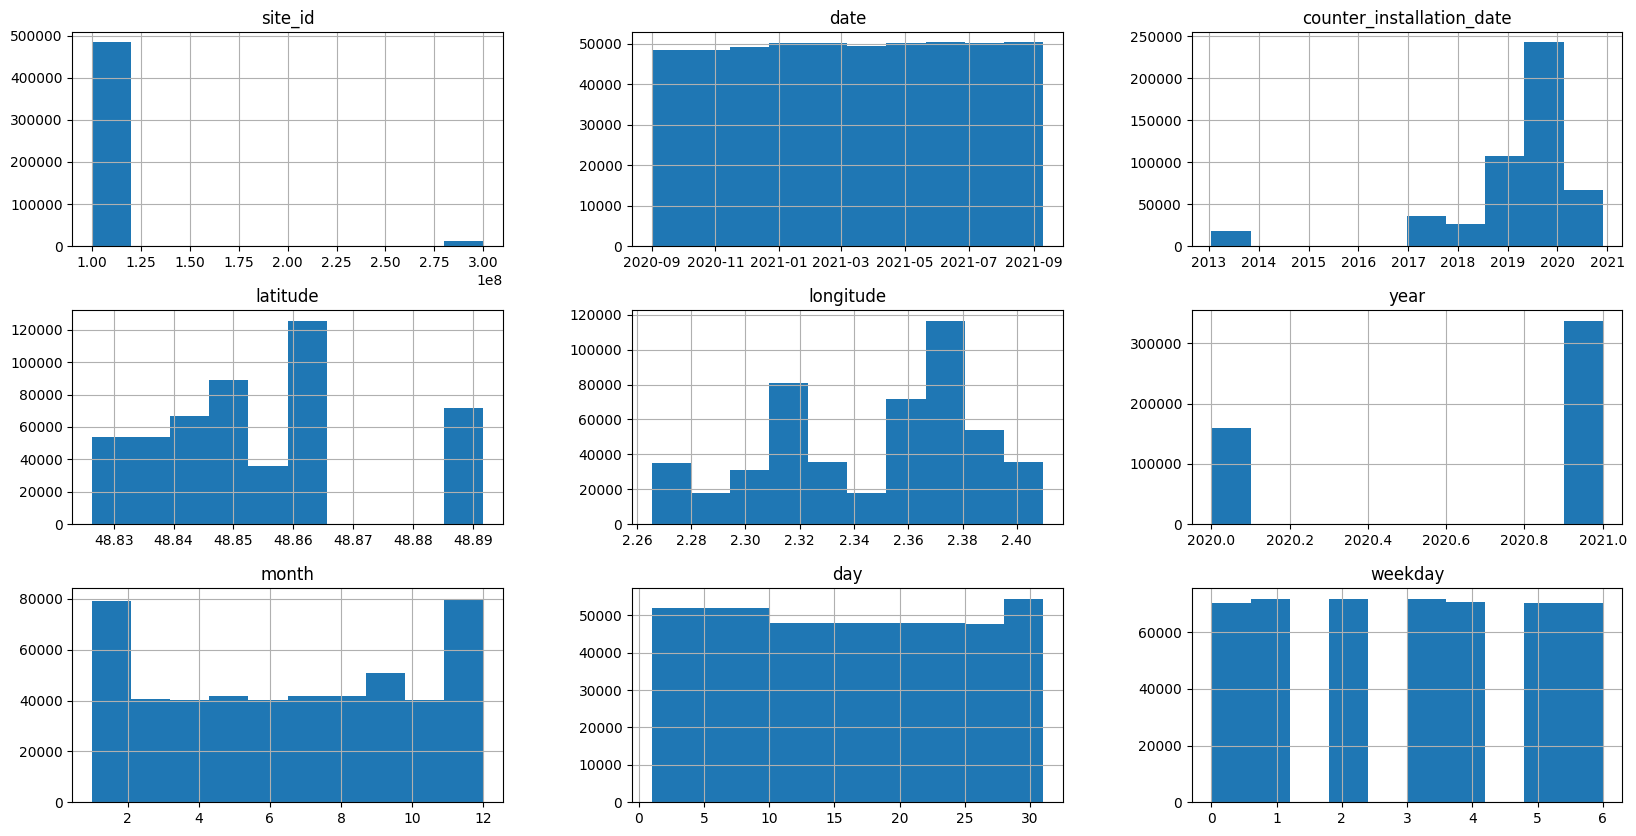

In [154]:
X.hist(figsize = (20,10))

In [155]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import numpy as np

# # Assuming X is your DataFrame and y is the numpy array
# # Ensure y is in the correct shape for plotting
# y_series = pd.Series(y, name="target")

# # 1. Visualize Numerical Columns Against y
# numerical_cols = X.select_dtypes(include=["int32", "int64", "float64"]).columns
# for col in numerical_cols:
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x=X[col], y=y_series, alpha=0.5)
#     plt.title(f"Correlation Between {col} and Target", fontsize=14)
#     plt.xlabel(col)
#     plt.ylabel("Target")
#     plt.show()

# # 2. Visualize Boolean Columns Against y
# bool_cols = X.select_dtypes(include=["bool"]).columns
# for col in bool_cols:
#     plt.figure(figsize=(6, 4))
#     sns.boxplot(x=X[col], y=y_series)
#     plt.title(f"Correlation Between {col} and Target", fontsize=14)
#     plt.xlabel(col)
#     plt.ylabel("Target")
#     plt.xticks([0, 1], ["False", "True"], rotation=0)
#     plt.show()

# # 3. Visualize Categorical Columns Against y
# categorical_cols = X.select_dtypes(include=["category"]).columns
# for col in categorical_cols:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x=X[col], y=y_series)
#     plt.title(f"Correlation Between {col} and Target", fontsize=14)
#     plt.xlabel(col)
#     plt.ylabel("Target")
#     plt.xticks(rotation=45)
#     plt.show()

# # 4. Visualize Datetime Columns Against y
# datetime_cols = X.select_dtypes(include=["datetime64[ns]"]).columns
# for col in datetime_cols:
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(x=X[col].dt.date, y=y_series, alpha=0.5)
#     plt.title(f"Correlation Between {col} and Target Over Time", fontsize=14)
#     plt.xlabel("Date")
#     plt.ylabel("Target")
#     plt.show()


In [156]:
X.isna().sum()

counter_id                   0
counter_name                 0
site_id                      0
site_name                    0
date                         0
counter_installation_date    0
coordinates                  0
counter_technical_id         0
latitude                     0
longitude                    0
year                         0
month                        0
day                          0
weekday                      0
is_weekend                   0
is_holiday                   0
hour_0                       0
hour_1                       0
hour_2                       0
hour_3                       0
hour_4                       0
hour_5                       0
hour_6                       0
hour_7                       0
hour_8                       0
hour_9                       0
hour_10                      0
hour_11                      0
hour_12                      0
hour_13                      0
hour_14                      0
hour_15                      0
hour_16 

In [157]:
X.nunique()

counter_id                     56
counter_name                   56
site_id                        30
site_name                      30
date                         8974
counter_installation_date      22
coordinates                    30
counter_technical_id           30
latitude                       30
longitude                      30
year                            2
month                          12
day                            31
weekday                         7
is_weekend                      2
is_holiday                      2
hour_0                          2
hour_1                          2
hour_2                          2
hour_3                          2
hour_4                          2
hour_5                          2
hour_6                          2
hour_7                          2
hour_8                          2
hour_9                          2
hour_10                         2
hour_11                         2
hour_12                         2
hour_13       

In [129]:
# "Comptage vélo - Données compteurs" from Paris Open Data, which provides hourly bicycle counts from various counters across Paris. 

weather_df = pd.read_csv('data/external_data.csv')
weather_df.head(2)

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4
0,7149,2021-01-01 00:00:00,100810,80,1,270,1.8,272.75,272.15,96,...,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7149,2021-01-01 03:00:00,100920,110,3,300,1.7,271.25,270.95,98,...,1500.0,2.0,3.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
weather_df.describe()

,numer_sta,pmer,tend,cod_tend,dd,ff,t,td,u,vv,...,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4
count,3322.0,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,...,2867.000000,1695.000000,1443.000000,1695.000000,618.000000,470.000000,618.000000,42.000000,87.000000,42.000000
mean,7149.0,101682.886815,-0.237809,4.273028,184.379892,3.654154,285.877905,281.006442,74.775135,20142.338952,...,2028.674573,5.030678,4.515593,2692.943953,5.441748,3.961702,3310.695793,3.476190,6.735632,3205.000000
std,0.0,923.888170,122.191314,2.713199,103.708084,2.000353,6.851700,5.634409,17.022427,10283.556918,...,2377.241533,2.003304,2.463098,2309.340104,2.017108,3.042454,2423.703985,2.360633,3.196873,2595.553656
min,7149.0,97260.000000,-750.000000,0.000000,0.000000,0.000000,267.650000,260.750000,24.000000,120.000000,...,0.000000,1.000000,0.000000,60.000000,1.000000,0.000000,300.000000,1.000000,0.000000,360.000000
25%,7149.0,101200.000000,-70.000000,2.000000,80.000000,2.200000,280.950000,276.950000,63.000000,12710.000000,...,500.000000,3.000000,3.000000,1080.000000,4.250000,0.000000,1400.000000,1.000000,6.000000,1112.500000
50%,7149.0,101820.000000,0.000000,3.000000,200.000000,3.400000,285.850000,281.450000,79.000000,20000.000000,...,1080.000000,5.000000,6.000000,1800.000000,6.000000,3.000000,2430.000000,2.500000,8.000000,2150.000000
75%,7149.0,102287.500000,70.000000,7.000000,260.000000,4.900000,290.650000,285.550000,89.000000,25000.000000,...,2100.000000,7.000000,6.000000,3400.000000,7.000000,6.000000,5000.000000,5.750000,9.000000,5800.000000
max,7149.0,103920.000000,720.000000,8.000000,360.000000,14.600000,307.450000,293.150000,100.000000,60000.000000,...,9000.000000,8.000000,9.000000,9000.000000,8.000000,9.000000,9000.000000,7.000000,9.000000,8000.000000


In [131]:
weather_df.columns

Index(['numer_sta', 'date', 'pmer', 'tend', 'cod_tend', 'dd', 'ff', 't', 'td',
       'u', 'vv', 'ww', 'w1', 'w2', 'n', 'nbas', 'hbas', 'cl', 'cm', 'ch',
       'pres', 'niv_bar', 'geop', 'tend24', 'tn12', 'tn24', 'tx12', 'tx24',
       'tminsol', 'sw', 'tw', 'raf10', 'rafper', 'per', 'etat_sol', 'ht_neige',
       'ssfrai', 'perssfrai', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24', 'phenspe1',
       'phenspe2', 'phenspe3', 'phenspe4', 'nnuage1', 'ctype1', 'hnuage1',
       'nnuage2', 'ctype2', 'hnuage2', 'nnuage3', 'ctype3', 'hnuage3',
       'nnuage4', 'ctype4', 'hnuage4'],
      dtype='object')

In [132]:
# Define a mapping of current column names to more meaningful names
column_mapping = {
    'numer_sta': 'station_id',
    'date': 'date',
    'pmer': 'sea_level_pressure',
    'tend': 'pressure_tendency',
    'cod_tend': 'pressure_tendency_code',
    'dd': 'wind_direction',
    'ff': 'wind_speed',
    't': 'air_temperature',
    'td': 'dew_point_temperature',
    'u': 'relative_humidity',
    'vv': 'visibility',
    'ww': 'current_weather_code',
    'w1': 'past_weather_1',
    'w2': 'past_weather_2',
    'n': 'total_cloud_cover',
    'nbas': 'low_cloud_cover',
    'hbas': 'low_cloud_height',
    'cl': 'low_cloud_type',
    'cm': 'medium_cloud_type',
    'ch': 'high_cloud_type',
    'pres': 'station_pressure',
    'niv_bar': 'barometric_level',
    'geop': 'geopotential_height',
    'tend24': '24hr_pressure_tendency',
    'tn12': '12hr_min_temperature',
    'tn24': '24hr_min_temperature',
    'tx12': '12hr_max_temperature',
    'tx24': '24hr_max_temperature',
    'tminsol': 'min_ground_temperature',
    'sw': 'sunshine_duration',
    'tw': 'wet_bulb_temperature',
    'raf10': '10min_max_wind_gust',
    'rafper': 'period_max_wind_gust',
    'per': 'gust_period_duration',
    'etat_sol': 'ground_state',
    'ht_neige': 'snow_depth',
    'ssfrai': 'fresh_snow_depth',
    'perssfrai': 'snowfall_duration',
    'rr1': '1hr_precipitation',
    'rr3': '3hr_precipitation',
    'rr6': '6hr_precipitation',
    'rr12': '12hr_precipitation',
    'rr24': '24hr_precipitation',
    'phenspe1': 'special_phenomena_1',
    'phenspe2': 'special_phenomena_2',
    'phenspe3': 'special_phenomena_3',
    'phenspe4': 'special_phenomena_4',
    'nnuage1': 'cloud_cover_layer1',
    'ctype1': 'cloud_type_layer1',
    'hnuage1': 'cloud_base_height_layer1',
    'nnuage2': 'cloud_cover_layer2',
    'ctype2': 'cloud_type_layer2',
    'hnuage2': 'cloud_base_height_layer2',
    'nnuage3': 'cloud_cover_layer3',
    'ctype3': 'cloud_type_layer3',
    'hnuage3': 'cloud_base_height_layer3',
    'nnuage4': 'cloud_cover_layer4',
    'ctype4': 'cloud_type_layer4',
    'hnuage4': 'cloud_base_height_layer4'
}

# Rename the columns in the DataFrame
weather_df.rename(columns=column_mapping, inplace=True)

# Display the renamed DataFrame's columns
weather_df.columns

Index(['station_id', 'date', 'sea_level_pressure', 'pressure_tendency',
       'pressure_tendency_code', 'wind_direction', 'wind_speed',
       'air_temperature', 'dew_point_temperature', 'relative_humidity',
       'visibility', 'current_weather_code', 'past_weather_1',
       'past_weather_2', 'total_cloud_cover', 'low_cloud_cover',
       'low_cloud_height', 'low_cloud_type', 'medium_cloud_type',
       'high_cloud_type', 'station_pressure', 'barometric_level',
       'geopotential_height', '24hr_pressure_tendency', '12hr_min_temperature',
       '24hr_min_temperature', '12hr_max_temperature', '24hr_max_temperature',
       'min_ground_temperature', 'sunshine_duration', 'wet_bulb_temperature',
       '10min_max_wind_gust', 'period_max_wind_gust', 'gust_period_duration',
       'ground_state', 'snow_depth', 'fresh_snow_depth', 'snowfall_duration',
       '1hr_precipitation', '3hr_precipitation', '6hr_precipitation',
       '12hr_precipitation', '24hr_precipitation', 'special_phenomen

In [133]:
empty_columns = weather_df.columns[weather_df.isna().all()]

weather_df.drop(empty_columns, axis=1, inplace=True)

In [134]:
cloud_columns = [col for col in weather_df.columns if 'cloud' in col.lower()]

weather_df.drop(cloud_columns, axis=1, inplace=True)

pressure_columns = [col for col in weather_df.columns if 'pressure' in col.lower()]

weather_df.drop(pressure_columns, axis=1, inplace=True)

In [135]:
weather_df.columns

Index(['station_id', 'date', 'wind_direction', 'wind_speed', 'air_temperature',
       'dew_point_temperature', 'relative_humidity', 'visibility',
       'current_weather_code', 'past_weather_1', 'past_weather_2',
       '12hr_min_temperature', '12hr_max_temperature',
       'min_ground_temperature', '10min_max_wind_gust', 'period_max_wind_gust',
       'gust_period_duration', 'ground_state', 'snow_depth',
       'fresh_snow_depth', 'snowfall_duration', '1hr_precipitation',
       '3hr_precipitation', '6hr_precipitation', '12hr_precipitation',
       '24hr_precipitation'],
      dtype='object')

In [136]:
weather_df['date'] = pd.to_datetime(weather_df['date'])

weather_df = weather_df.drop_duplicates(subset='date', keep='first')

merged_df = X.merge(weather_df, how='left', on='date')

merged_df.set_index(X.index, inplace=True)

print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 400125 to 135985
Data columns (total 65 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  int64         
 3   site_name                  496827 non-null  category      
 4   date                       496827 non-null  datetime64[us]
 5   counter_installation_date  496827 non-null  datetime64[us]
 6   coordinates                496827 non-null  category      
 7   counter_technical_id       496827 non-null  category      
 8   latitude                   496827 non-null  float64       
 9   longitude                  496827 non-null  float64       
 10  year                       496827 non-null  int32         
 11  month                      496827 non-null  int32   

In [137]:
# Calculate missing values
missing_values = merged_df.isna().sum().reset_index()
missing_values.columns = ['Column', 'Missing Count']
missing_values['Missing Percentage'] = (missing_values['Missing Count'] / len(merged_df)) * 100


# Add data type of each column to the summary
missing_values['Data Type'] = missing_values['Column'].map(merged_df.dtypes)

# Rearrange columns for better readability
missing_values = missing_values[['Column', 'Data Type', 'Missing Count', 'Missing Percentage']]

# Sort by Missing Count or Duplicate Count
missing_values = missing_values.sort_values(by=['Missing Count'], ascending=False).reset_index(drop=True)

missing_values[0:20]


,Column,Data Type,Missing Count,Missing Percentage
0,min_ground_temperature,float64,496771,99.988728
1,12hr_max_temperature,float64,455529,91.687650
2,12hr_min_temperature,float64,455529,91.687650
3,snowfall_duration,float64,353815,71.214930
4,fresh_snow_depth,float64,353815,71.214930
5,ground_state,float64,334229,67.272713
6,snow_depth,float64,333965,67.219575
7,24hr_precipitation,float64,332517,66.928126
8,12hr_precipitation,float64,332405,66.905583
9,6hr_precipitation,float64,332181,66.860497


In [138]:
# Sort the DataFrame by 'date'
merged_df = merged_df.sort_values(by='date')

# Ensure 'date' is in datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Extract the date part without the time for grouping
merged_df['date_only'] = merged_df['date'].dt.date

# Identify columns of type float or int
numeric_columns = merged_df.select_dtypes(include=['float', 'int']).columns

# Fill missing values in numeric columns with the average for the same date rows
for col in numeric_columns:
    merged_df[col] = merged_df.groupby('date_only')[col].transform(
        lambda x: x.fillna(x.mean()) if not x.empty else x
    )

# Drop the helper 'date_only' column
merged_df = merged_df.drop(columns=['date_only'])

# Display the first few rows of the updated DataFrame
merged_df.head()


,counter_id,counter_name,site_id,site_name,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,...,gust_period_duration,ground_state,snow_depth,fresh_snow_depth,snowfall_duration,1hr_precipitation,3hr_precipitation,6hr_precipitation,12hr_precipitation,24hr_precipitation
400125,100049407-353255860,152 boulevard du Montparnasse E-O,100049407,152 boulevard du Montparnasse,2020-09-01 01:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233,...,-10.0,0.0,0.0,0.0,-40.0,0.0,0.0,0.0,0.0,0.0
264221,100047542-103047542,Face au 48 quai de la marne NE-SO,100047542,Face au 48 quai de la marne,2020-09-01 01:00:00,2018-11-29,"48.89172,2.38531",Y2H18086318,48.891720,2.385310,...,-10.0,0.0,0.0,0.0,-40.0,0.0,0.0,0.0,0.0,0.0
273932,100047542-104047542,Face au 48 quai de la marne SO-NE,100047542,Face au 48 quai de la marne,2020-09-01 01:00:00,2018-11-29,"48.89172,2.38531",Y2H18086318,48.891720,2.385310,...,-10.0,0.0,0.0,0.0,-40.0,0.0,0.0,0.0,0.0,0.0
314403,100047546-104047546,Face au 70 quai de Bercy N-S,100047546,Face au 70 quai de Bercy,2020-09-01 01:00:00,2018-11-30,"48.829523,2.38699",Y2H20022165,48.829523,2.386990,...,-10.0,0.0,0.0,0.0,-40.0,0.0,0.0,0.0,0.0,0.0
324174,100047546-103047546,Face au 70 quai de Bercy S-N,100047546,Face au 70 quai de Bercy,2020-09-01 01:00:00,2018-11-30,"48.829523,2.38699",Y2H20022165,48.829523,2.386990,...,-10.0,0.0,0.0,0.0,-40.0,0.0,0.0,0.0,0.0,0.0


In [139]:
# Calculate missing values
missing_values = merged_df.isna().sum().reset_index()
missing_values.columns = ['Column', 'Missing Count']
missing_values['Missing Percentage'] = (missing_values['Missing Count'] / len(merged_df)) * 100


# Add data type of each column to the summary
missing_values['Data Type'] = missing_values['Column'].map(merged_df.dtypes)

# Rearrange columns for better readability
missing_values = missing_values[['Column', 'Data Type', 'Missing Count', 'Missing Percentage']]

# Sort by Missing Count or Duplicate Count
missing_values = missing_values.sort_values(by=['Missing Count'], ascending=False).reset_index(drop=True)

missing_values[0:20]


,Column,Data Type,Missing Count,Missing Percentage
0,min_ground_temperature,float64,495483,99.729483
1,snowfall_duration,float64,2684,0.540228
2,fresh_snow_depth,float64,2684,0.540228
3,counter_id,category,0,0.000000
4,counter_name,category,0,0.000000
5,counter_installation_date,datetime64[us],0,0.000000
6,site_id,int64,0,0.000000
7,site_name,category,0,0.000000
8,date,datetime64[us],0,0.000000
9,longitude,float64,0,0.000000


In [140]:
numerical_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns
numerical_df = merged_df[numerical_cols]

constant_columns = numerical_df.columns[numerical_df.nunique() <= 1]
print(f"Constant columns: {constant_columns.tolist()}")


Constant columns: ['station_id', 'gust_period_duration']


In [141]:
merged_df.drop(columns=constant_columns, inplace=True)

In [142]:
# Check for NaN values
numerical_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns

nan_columns = merged_df[numerical_cols].columns[merged_df[numerical_cols].isna().any()]
print(f"Columns with NaN values: {nan_columns.tolist()}")

# Check for infinite values
inf_columns = merged_df[numerical_cols].columns[np.isinf(merged_df[numerical_cols]).any()]
print(f"Columns with Inf values: {inf_columns.tolist()}")


Columns with NaN values: ['min_ground_temperature', 'fresh_snow_depth', 'snowfall_duration']
Columns with Inf values: []


In [143]:
merged_df.drop(columns=nan_columns, axis=1, inplace=True)

In [158]:
def train_test_split_temporal(X, y, delta_threshold="30 days"):
    
    cutoff_date = X["date"].max() - pd.Timedelta(delta_threshold)
    mask = (X["date"] <= cutoff_date)
    X_train, X_valid = X.loc[mask], X.loc[~mask]
    y_train, y_valid = y[mask], y[~mask]

    return X_train, y_train, X_valid, y_valid

In [145]:
# X.drop(columns=["date"])

In [30]:
# Sort by 'date' without affecting the index
# merged_df = merged_df.sort_values(by='date', kind="mergesort")

In [31]:
# merged_df.drop(['date', 'counter_installation_date'], axis=1, inplace=True)

In [146]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler


# Step 1: Preprocessing
# One-hot encode the categorical variables
categorical_cols = merged_df.select_dtypes(include=['object', 'category']).columns
onehot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
categorical_encoded = onehot_encoder.fit_transform(merged_df[categorical_cols])

# Numerical scaling
numerical_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(merged_df[numerical_cols])

# Drop processed columns
merged_df.drop(categorical_cols, axis=1, inplace=True)
merged_df.drop(numerical_cols, axis=1, inplace=True)

# Ensure date column is in datetime format
merged_df["date"] = pd.to_datetime(merged_df["date"])

# Combine all features
X_combined = np.hstack([merged_df.values, categorical_encoded, numerical_scaled])

# Step 2: Reshape for LSTM
# LSTM requires 3D input: (samples, timesteps, features)
# Assuming each sample has a single timestep
X_reshaped = X_combined.reshape(X_combined.shape[0], 1, X_combined.shape[1])

# Step 3: Temporal Train-Test Split
# Convert X_reshaped back into a DataFrame to preserve the date column
X_combined_df = pd.DataFrame(X_combined, columns=[f"feature_{i}" for i in range(X_combined.shape[1])])
X_combined_df["date"] = merged_df["date"].values  # Restore the date column


# Apply temporal train-test split
X_train_split, y_train_split, X_test_split, y_test_split = train_test_split_temporal(X_combined_df, y)


# Remove the 'date' column after splitting
datetime_columns = X_test_split.select_dtypes(include=['datetime64[ns]']).columns
print(f"Columns with datetime64[ns] dtype: {datetime_columns.tolist()}")
datetime_columns = X_test_split.select_dtypes(include=['datetime64[ns]']).columns
print(f"Columns with datetime64[ns] dtype: {datetime_columns.tolist()}")

# Drop these columns from X_train_split
X_train_split = X_train_split.drop(columns=datetime_columns)
# Drop these columns from X_test_split
X_test_split = X_test_split.drop(columns=datetime_columns)





Columns with datetime64[ns] dtype: ['feature_0', 'feature_1', 'date']
Columns with datetime64[ns] dtype: ['feature_0', 'feature_1', 'date']


In [159]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler


# Step 1: Preprocessing
# One-hot encode the categorical variables
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
onehot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
categorical_encoded = onehot_encoder.fit_transform(X[categorical_cols])

# Numerical scaling
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(X[numerical_cols])

# Drop processed columns
X.drop(categorical_cols, axis=1, inplace=True)
X.drop(numerical_cols, axis=1, inplace=True)

# Ensure date column is in datetime format
X["date"] = pd.to_datetime(X["date"])

# Combine all features
X_combined = np.hstack([X.values, categorical_encoded, numerical_scaled])

# Step 2: Reshape for LSTM
# LSTM requires 3D input: (samples, timesteps, features)
# Assuming each sample has a single timestep
X_reshaped = X_combined.reshape(X_combined.shape[0], 1, X_combined.shape[1])

# Step 3: Temporal Train-Test Split
# Convert X_reshaped back into a DataFrame to preserve the date column
X_combined_df = pd.DataFrame(X_combined, columns=[f"feature_{i}" for i in range(X_combined.shape[1])])
X_combined_df["date"] = X["date"].values  # Restore the date column


# Apply temporal train-test split
X_train_split, y_train_split, X_test_split, y_test_split = train_test_split_temporal(X_combined_df, y)


# Remove the 'date' column after splitting
datetime_columns = X_test_split.select_dtypes(include=['datetime64[ns]']).columns
print(f"Columns with datetime64[ns] dtype: {datetime_columns.tolist()}")
datetime_columns = X_test_split.select_dtypes(include=['datetime64[ns]']).columns
print(f"Columns with datetime64[ns] dtype: {datetime_columns.tolist()}")

# Drop these columns from X_train_split
X_train_split = X_train_split.drop(columns=datetime_columns)
# Drop these columns from X_test_split
X_test_split = X_test_split.drop(columns=datetime_columns)





Columns with datetime64[ns] dtype: ['feature_0', 'feature_1', 'date']
Columns with datetime64[ns] dtype: ['feature_0', 'feature_1', 'date']


In [ ]:
# X_train_split = X_train_split.astype(float).values.reshape(X_train_split.shape[0], 1, -1)
# X_test_split = X_test_split.astype(float).values.reshape(X_test_split.shape[0], 1, -1)

# # Step 4: Define LSTM Model
# model = Sequential()
# model.add(LSTM(50, activation="relu", input_shape=(X_train_split.shape[1], X_train_split.shape[2])))
# model.add(Dense(1))
# model.compile(optimizer="adam", loss="mse")

# # Step 5: Train the Model
# model.fit(X_train_split, y_train_split, epochs=10, batch_size=32, verbose=2)

# # Step 6: Evaluate the Model
# loss = model.evaluate(X_test_split, y_test_split)
# print(f"Test Loss: {loss}")

In [160]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
import xgboost as xgb
import lightgbm as lgb

# Define models to evaluate
models = {
    # "SVM": SVR(),
    # "Random Forest": RandomForestRegressor(random_state=42),
    "Elastic Net": ElasticNet(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42, verbosity=1),
    "LightGBM": lgb.LGBMRegressor(random_state=42)
}

# Initialize a dictionary to store results
results = {}

X_train_split = X_train_split.astype(float)
X_test_split = X_test_split.astype(float)


# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_split, y_train_split)

    # Predict on the test set
    y_pred = model.predict(X_test_split)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test_split, y_pred))
    results[name] = rmse
    print(f"Model: {name}, RMSE: {rmse}")

# Convert results to a DataFrame and display
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['RMSE']).sort_values(by='RMSE')

# Display the results
print(results_df)


Model: Elastic Net, RMSE: 1.4912815630969098
Model: XGBoost, RMSE: 0.5126279064139162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 604
[LightGBM] [Info] Number of data points in the train set: 456507, number of used features: 235
[LightGBM] [Info] Start training from score 3.048868
Model: LightGBM, RMSE: 0.5408306427264873
                 RMSE
XGBoost      0.512628
LightGBM     0.540831
Elastic Net  1.491282


Pre-Processing Final Test Parquet

In [161]:
final_test = utils.get_test_data()
final_test.head(2)

,counter_id,counter_name,site_id,site_name,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude
17081,100049407-353255860,152 boulevard du Montparnasse E-O,100049407,152 boulevard du Montparnasse,2021-09-10 01:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233
18655,100049407-353255859,152 boulevard du Montparnasse O-E,100049407,152 boulevard du Montparnasse,2021-09-10 01:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233


In [162]:
date_encoder = FunctionTransformer(_encode_dates, validate=False)
final_test = date_encoder.fit_transform(final_test)
final_test.head(2)

,counter_id,counter_name,site_id,site_name,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,year,month,day,weekday,hour,is_weekend,is_holiday
17081,100049407-353255860,152 boulevard du Montparnasse E-O,100049407,152 boulevard du Montparnasse,2021-09-10 01:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233,2021,9,10,4,1,False,False
18655,100049407-353255859,152 boulevard du Montparnasse O-E,100049407,152 boulevard du Montparnasse,2021-09-10 01:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233,2021,9,10,4,1,False,False


In [163]:
final_test = pd.get_dummies(final_test, columns=["hour"], prefix="hour")
final_test.head(2)

,counter_id,counter_name,site_id,site_name,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
17081,100049407-353255860,152 boulevard du Montparnasse E-O,100049407,152 boulevard du Montparnasse,2021-09-10 01:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233,...,False,False,False,False,False,False,False,False,False,False
18655,100049407-353255859,152 boulevard du Montparnasse O-E,100049407,152 boulevard du Montparnasse,2021-09-10 01:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233,...,False,False,False,False,False,False,False,False,False,False


In [45]:


merged_test = final_test.merge(weather_df, how='left', on='date')

merged_test.set_index(final_test.index, inplace=True)

print(merged_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51440 entries, 17081 to 6855
Data columns (total 88 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   counter_id                 51440 non-null  category      
 1   counter_name               51440 non-null  category      
 2   site_id                    51440 non-null  int64         
 3   site_name                  51440 non-null  category      
 4   date                       51440 non-null  datetime64[us]
 5   counter_installation_date  51440 non-null  datetime64[us]
 6   coordinates                51440 non-null  category      
 7   counter_technical_id       51440 non-null  category      
 8   latitude                   51440 non-null  float64       
 9   longitude                  51440 non-null  float64       
 10  year                       51440 non-null  int32         
 11  month                      51440 non-null  int32         
 12  day   

In [46]:
cloud_columns = [col for col in merged_test.columns if 'cloud' in col.lower()]

merged_test.drop(cloud_columns, axis=1, inplace=True)

In [47]:
# Sort the DataFrame by 'date'
merged_test = merged_test.sort_values(by='date')

# Ensure 'date' is in datetime format
merged_test['date'] = pd.to_datetime(merged_test['date'])

# Extract the date part without the time for grouping
merged_test['date_only'] = merged_test['date'].dt.date

# Identify columns of type float or int
numeric_columns = merged_test.select_dtypes(include=['float', 'int']).columns

# Fill missing values in numeric columns with the average for the same date rows
for col in numeric_columns:
    merged_test[col] = merged_test.groupby('date_only')[col].transform(
        lambda x: x.fillna(x.mean()) if not x.empty else x
    )

# Drop the helper 'date_only' column
merged_test = merged_test.drop(columns=['date_only'])

# Display the first few rows of the updated DataFrame
merged_test.head()


,counter_id,counter_name,site_id,site_name,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,...,gust_period_duration,ground_state,snow_depth,fresh_snow_depth,snowfall_duration,1hr_precipitation,3hr_precipitation,6hr_precipitation,12hr_precipitation,24hr_precipitation
17081,100049407-353255860,152 boulevard du Montparnasse E-O,100049407,152 boulevard du Montparnasse,2021-09-10 01:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233,...,-10.0,0.428571,0.0,0.0,-42.857143,0.342857,0.628571,1.028571,1.628571,1.971429
32323,100056331-103056331,Face au 40 quai D'Issy SO-NE,100056331,Face au 40 quai D'Issy,2021-09-10 01:00:00,2019-11-05,"48.83421,2.26542",Y2H19070377,48.834210,2.265420,...,-10.0,0.428571,0.0,0.0,-42.857143,0.342857,0.628571,1.028571,1.628571,1.971429
8044,100047542-103047542,Face au 48 quai de la marne NE-SO,100047542,Face au 48 quai de la marne,2021-09-10 01:00:00,2018-11-29,"48.89172,2.38531",Y2H18086318,48.891720,2.385310,...,-10.0,0.428571,0.0,0.0,-42.857143,0.342857,0.628571,1.028571,1.628571,1.971429
9321,100047542-104047542,Face au 48 quai de la marne SO-NE,100047542,Face au 48 quai de la marne,2021-09-10 01:00:00,2018-11-29,"48.89172,2.38531",Y2H18086318,48.891720,2.385310,...,-10.0,0.428571,0.0,0.0,-42.857143,0.342857,0.628571,1.028571,1.628571,1.971429
12125,100047546-104047546,Face au 70 quai de Bercy N-S,100047546,Face au 70 quai de Bercy,2021-09-10 01:00:00,2018-11-30,"48.829523,2.38699",Y2H20022165,48.829523,2.386990,...,-10.0,0.428571,0.0,0.0,-42.857143,0.342857,0.628571,1.028571,1.628571,1.971429


In [48]:
merged_test.drop(columns=['station_id', 'gust_period_duration'], inplace=True)

In [49]:
merged_test.drop(columns=['min_ground_temperature', 'fresh_snow_depth', 'snowfall_duration'], inplace=True)

In [50]:
merged_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51440 entries, 17081 to 6855
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   counter_id                 51440 non-null  category      
 1   counter_name               51440 non-null  category      
 2   site_id                    51440 non-null  int64         
 3   site_name                  51440 non-null  category      
 4   date                       51440 non-null  datetime64[us]
 5   counter_installation_date  51440 non-null  datetime64[us]
 6   coordinates                51440 non-null  category      
 7   counter_technical_id       51440 non-null  category      
 8   latitude                   51440 non-null  float64       
 9   longitude                  51440 non-null  float64       
 10  year                       51440 non-null  int32         
 11  month                      51440 non-null  int32         
 12  day   

In [ ]:
# Step 1: Preprocessing
# One-hot encode the categorical variables
categorical_cols = merged_test.select_dtypes(include=['object', 'category']).columns
onehot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
categorical_encoded = onehot_encoder.fit_transform(merged_test[categorical_cols])

# Numerical scaling
numerical_cols = merged_test.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(merged_test[numerical_cols])

# Drop processed columns
merged_test.drop(categorical_cols, axis=1, inplace=True)
merged_test.drop(numerical_cols, axis=1, inplace=True)

# Ensure date column is in datetime format
merged_test["date"] = pd.to_datetime(merged_test["date"])

# Combine all features
X_combined = np.hstack([merged_test.values, categorical_encoded, numerical_scaled])

# Step 2: Reshape for LSTM
# LSTM requires 3D input: (samples, timesteps, features)
# Assuming each sample has a single timestep
X_reshaped = X_combined.reshape(X_combined.shape[0], 1, X_combined.shape[1])

# Step 3: Temporal Train-Test Split
# Convert X_reshaped back into a DataFrame to preserve the date column
X_combined_df = pd.DataFrame(X_combined, columns=[f"feature_{i}" for i in range(X_combined.shape[1])])
X_combined_df["date"] = merged_test["date"].values  # Restore the date column


# Apply temporal train-test split
# X_train_split, y_train_split, X_test_split, y_test_split = train_test_split_temporal(X_combined_df, y)


# Remove the 'date' column after splitting
datetime_columns = X_combined_df.select_dtypes(include=['datetime64[ns]']).columns
print(f"Columns with datetime64[ns] dtype: {datetime_columns.tolist()}")


# Drop these columns from X_train_split
X_combined_df = X_combined_df.drop(columns=datetime_columns)



X_combined_df = X_combined_df.astype(float).values.reshape(X_combined_df.shape[0], 1, -1)


Columns with datetime64[ns] dtype: ['feature_0', 'feature_1', 'date']


In [ ]:
predictions = model.predict(X_combined_df)

# Step 4: Prepare the submission file
submission = pd.DataFrame({"id": merged_test.index, "log_bike_count": predictions.flatten()})
submission_path = "submission_new_lstm.csv"
submission.to_csv(submission_path, index=False)


Normal Models Predictions

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler


# Step 1: Preprocessing
# One-hot encode the categorical variables
categorical_cols = final_test.select_dtypes(include=['object', 'category']).columns
onehot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
categorical_encoded = onehot_encoder.fit_transform(final_test[categorical_cols])

# Numerical scaling
numerical_cols = final_test.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(final_test[numerical_cols])

# Drop processed columns
final_test.drop(categorical_cols, axis=1, inplace=True)
final_test.drop(numerical_cols, axis=1, inplace=True)

# Ensure date column is in datetime format
final_test["date"] = pd.to_datetime(merged_df["date"])

# Combine all features
X_combined = np.hstack([final_test.values, categorical_encoded, numerical_scaled])

# Step 2: Reshape for LSTM
# LSTM requires 3D input: (samples, timesteps, features)
# Assuming each sample has a single timestep
X_reshaped = X_combined.reshape(X_combined.shape[0], 1, X_combined.shape[1])

# Step 3: Temporal Train-Test Split
# Convert X_reshaped back into a DataFrame to preserve the date column
X_combined_df = pd.DataFrame(X_combined, columns=[f"feature_{i}" for i in range(X_combined.shape[1])])
X_combined_df["date"] = final_test["date"].values  # Restore the date column


datetime_columns = X_combined_df.select_dtypes(include=['datetime64[ns]']).columns
print(f"Columns with datetime64[ns] dtype: {datetime_columns.tolist()}")

X_combined_df = X_combined_df.drop(columns=datetime_columns)

X_combined_df = X_combined_df.astype(float)

predictions = model.predict(X_combined_df)

# Step 4: Prepare the submission file
submission = pd.DataFrame({"id": merged_test.index, "log_bike_count": predictions.flatten()})
submission_path = "submission_new_lstm.csv"
submission.to_csv(submission_path, index=False)


Columns with datetime64[ns] dtype: ['feature_0', 'feature_1', 'date']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler


# Step 1: Preprocessing
# One-hot encode the categorical variables
categorical_cols = merged_df.select_dtypes(include=['object', 'category']).columns
onehot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
categorical_encoded = onehot_encoder.fit_transform(merged_df[categorical_cols])

# Numerical scaling
numerical_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(merged_df[numerical_cols])

# Drop processed columns
merged_df.drop(categorical_cols, axis=1, inplace=True)
merged_df.drop(numerical_cols, axis=1, inplace=True)

# Ensure date column is in datetime format
merged_df["date"] = pd.to_datetime(merged_df["date"])

# Combine all features
X_combined = np.hstack([merged_df.values, categorical_encoded, numerical_scaled])

# Step 2: Reshape for LSTM
# LSTM requires 3D input: (samples, timesteps, features)
# Assuming each sample has a single timestep
X_reshaped = X_combined.reshape(X_combined.shape[0], 1, X_combined.shape[1])

# Step 3: Temporal Train-Test Split
# Convert X_reshaped back into a DataFrame to preserve the date column
X_combined_df = pd.DataFrame(X_combined, columns=[f"feature_{i}" for i in range(X_combined.shape[1])])
X_combined_df["date"] = merged_df["date"].values  # Restore the date column


datetime_columns = X_combined_df.select_dtypes(include=['datetime64[ns]']).columns
print(f"Columns with datetime64[ns] dtype: {datetime_columns.tolist()}")

X_combined_df = X_combined_df.drop(columns=datetime_columns)

X_combined_df = X_combined_df.astype(float)

predictions = model.predict(X_combined_df)

# Step 4: Prepare the submission file
submission = pd.DataFrame({"id": merged_test.index, "log_bike_count": predictions.flatten()})
submission_path = "submission_new_lstm.csv"
submission.to_csv(submission_path, index=False)
